In [91]:
from TransferSAM import Predictor, load_KiTSAM, KiTSAM
from TransferSAM.utils.create_prompt import draw_boxes
import nibabel as nib
import matplotlib.pyplot as plt

# Setting up the model

In [35]:
kitsam = load_KiTSAM('/Users/giorginozadze/Desktop/TransferSAM/models/KiTSAM.pkl')
predictor = Predictor(kitsam.sam_base, kitsam.model_roi, kitsam.tumor_decoder, kitsam.cyst_decoder)

# Loading Test Slices

In [50]:
image = nib.load("data/test_images.nii.gz").get_fdata()
gt_mask = nib.load("data/test_seg.nii.gz").get_fdata()

# ROI Prediction (Identifying Kidneys)

In [89]:
# Embedding image
emb = predictor.generate_embedding(image[0])
# Prediction Region-Of-Interest
bool_mask, _ = predictor.predict_ROI(emb)

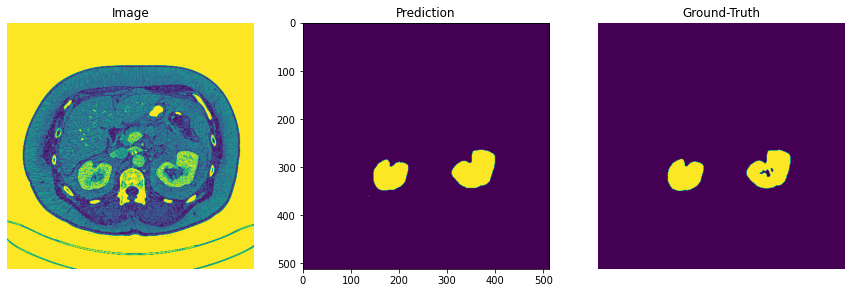

In [132]:
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
axes[0].imshow(image[0]), axes[1].imshow(bool_mask), axes[2].imshow(gt_mask[0])
axes[0].set_title("Image"), axes[1].set_title("Prediction"), axes[2].set_title("Ground-Truth") 
_, _, _ = axes[0].axis("off"), axes[2].axis("off"), axes[2].axis("off")

# ROI  + Mases (Cyst and Tumor) Prediction

In [110]:
prediction_mask = predictor.predict_complete(image[1])

There is 1 Kidney in the slice


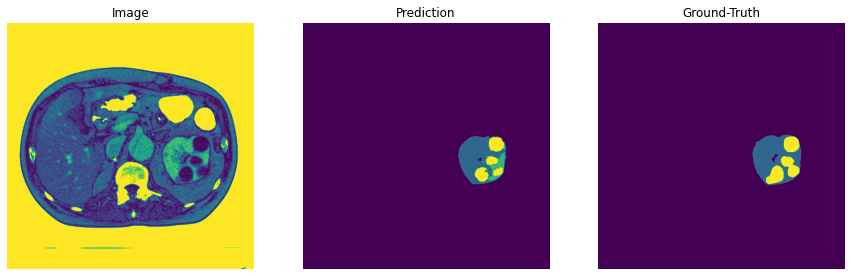

In [133]:
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
axes[0].imshow(image[1]), axes[1].imshow(prediction_mask), axes[2].imshow(gt_mask[1])
axes[0].set_title("Image"), axes[1].set_title("Prediction"), axes[2].set_title("Ground-Truth") 
_, _, _ = axes[0].axis("off"), axes[1].axis("off"), axes[2].axis("off")

# Further Example

In [113]:
further_mask = predictor.predict_complete(image[2])

There are 2 Kidneys in the slice


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


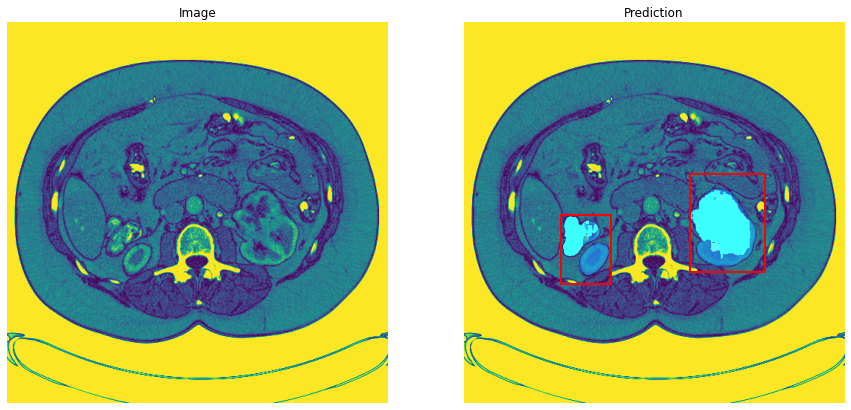

In [136]:
_, boxes = draw_boxes(further_mask)
fig, axes = plt.subplots(1, 2, figsize=(15, 15))
axes[0].imshow(image[2])
predictor.visualize_result(image[2], further_mask, boxes=boxes)
axes[0].axis("off"), axes[1].axis("off")
_, _ = axes[0].set_title("Image"), axes[1].set_title("Prediction")